In [6]:
import pandas as pd
import tweepy
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Authentication

In [2]:
CONSUMER_KEY = "G3ntWhNDlHyVQKH3gbWhVTmWC"
CONSUMER_SECRET = "uQXdpQrMPcrOqT29WR83BfhlADrnPwAfAUnfAQjATCSgHdvBF4"
ACCESS_TOKEN = "164258952-3l5ftr4vs7EIGyLhI1DzPS65zKQpeXJhgQgIc51o"
ACCESS_TOKEN_SECRET = "sWzLSWbpDyUhAfr8usialGIvape83zJCPQTIdS52OQtOM"

In [3]:
# creating an OAuthHandler instance

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

In [4]:
#  create an instance of tweepy.API

api = tweepy.API(auth)

# creating json file

In [7]:
# json file andrewng timeline

with open('andrewng.json', 'w') as f:
    for page in tweepy.Cursor(api.user_timeline,screen_name='AndrewYNg', count=200).pages(4):
        for status in page:
            f.write(json.dumps(status._json)+"\n")

In [10]:
ls

andrewng.json          multipleChoiceResponses.csv  software_analysis.ipynb
categorical.ipynb      RespondentTypeREADME.txt     To _json.ipynb
conversionRates.csv    sample.txt                   tweepy.ipynb
freeformResponses.csv  schema.csv                   Untitled.ipynb


# creating pandas dataframe from json

In [13]:
f = pd.read_json('andrewng.json', lines=True)
f.head()

contributors coordinates          created_at  \
0           NaN        None 2017-12-28 21:06:56   
1           NaN        None 2017-12-23 02:39:36   
2           NaN        None 2017-12-20 20:42:00   
3           NaN        None 2017-12-14 22:14:17   
4           NaN        None 2017-12-14 18:52:52   

                                            entities extended_entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...               NaN   
1  {'hashtags': [], 'symbols': [], 'user_mentions...               NaN   
2  {'hashtags': [], 'symbols': [], 'user_mentions...               NaN   
3  {'hashtags': [], 'symbols': [], 'user_mentions...               NaN   
4  {'hashtags': [], 'symbols': [], 'user_mentions...               NaN   

   favorite_count  favorited   geo                  id              id_str  \
0            1835      False  None  946487653993562112  946487653993562112   
1             350      False  None  944397045024006145  944397045024006144   
2            1606      False  None  943582279384711168  943582279384711168   
3             419      False  None  941431173602930688  941431173602930688   
4             625      False  None  941380483853643776  941380483853643776   

                         ...                         quoted_status  \
0                        ...                                   NaN   
1                        ...                                   NaN   
2                        ...                                   NaN   
3                        ...                                   NaN   
4                        ...                                   NaN   

   quoted_status_id  quoted_status_id_str  retweet_count  retweeted  \
0               NaN                   NaN            622      False   
1               NaN                   NaN            153      False   
2               NaN                   NaN            625      False   
3               NaN                   NaN            172      False   
4               NaN                   NaN            255      False   

   retweeted_status                                             source  \
0               NaN  <a href="http://twitter.com" rel="nofollow">Tw...   
1               NaN  <a href="http://twitter.com" rel="nofollow">Tw...   
2               NaN  <a href="http://twitter.com" rel="nofollow">Tw...   
3               NaN  <a href="http://twitter.com" rel="nofollow">Tw...   
4               NaN  <a href="http://twitter.com" rel="nofollow">Tw...   

                                                text  truncated  \
0  Question for everyone: Can you name a 2017 AI ...       True   
1  Enjoyed chatting with @mollywood about Landing...       True   
2  Want your first AI job? Come intern with me! W...       True   
3  8/Adding to this thread 5 months later. Here's...      False   
4  Demo of Deep Learning for automatic visual ins...       True   

                                                user  
0  {'id': 216939636, 'id_str': '216939636', 'name...  
1  {'id': 216939636, 'id_str': '216939636', 'name...  
2  {'id': 216939636, 'id_str': '216939636', 'name...  
3  {'id': 216939636, 'id_str': '216939636', 'name...  
4  {'id': 216939636, 'id_str': '216939636', 'name...  

[5 rows x 29 columns]

# frequency of hashtags

In [18]:
word = f.text.str.findall(r'#[a-zA-z0-9]*')
word = word.apply(pd.Series).stack().value_counts()
word.head(10)

#CES2017         6
#nips2016        6
#DeepLearning    5
#AI              5
#2               5
#NIPS2016        4
#1               4
#ISC16           3
#SparkSummit     3
#deeplearning    3
dtype: int64

# representing word frequncy in word cloud

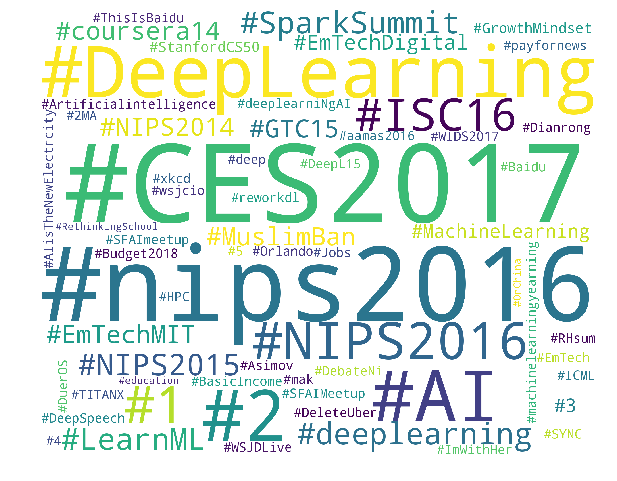

In [20]:
wordcloud = WordCloud(background_color='white',width=2500,height=2000).generate_from_frequencies(word)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()